In [2]:
import rpy2

In [3]:
%load_ext rpy2.ipython

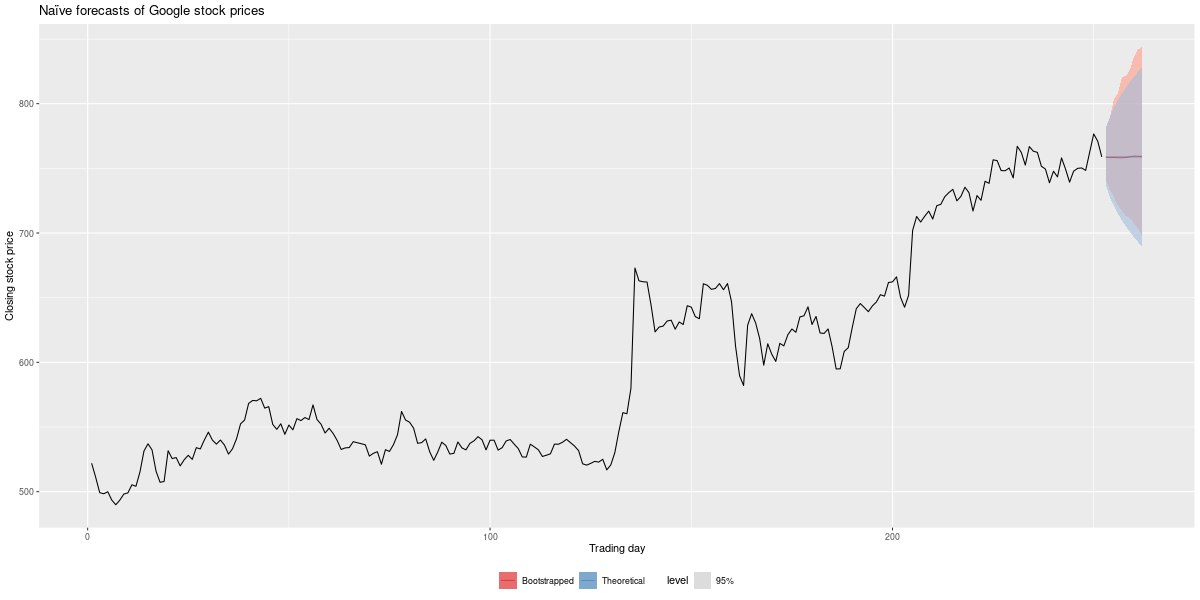

In [6]:
%%R -w 1200 -h 600

# Load required libraries
library(fpp3)  # For time series forecasting
library(ggdist)  # For distribution and uncertainty visualizations

# Filter and prepare the data
google_2015 <- gafa_stock |>
  filter(Symbol == "GOOG", year(Date) == 2015) |>  # Select Google stock data for 2015
  mutate(day = row_number()) |>  # Add a day column for indexing
  update_tsibble(index = day, regular = TRUE)  # Update the time series object

# Fit a naive forecasting model
fit <- google_2015 |>
  model(naive = NAIVE(Close))  # Use the naive method on closing prices

# Generate forecasts
fc <- bind_rows(
  forecast(fit, h = 10) |> mutate(.model = "Theoretical"),  # Theoretical forecast for 10 days ahead
  forecast(fit, h = 10, bootstrap = TRUE, times = 1000) |> mutate(.model = "Bootstrapped")  # Bootstrapped forecast
)

# Create a time plot of the forecasts
fc |>
  autoplot(google_2015, alpha = 0.6, level = 95) +  # Plot forecasts with 95% confidence interval
  ggtitle("Naïve forecasts of Google stock prices") +
  labs(y = "Closing stock price", x = "Trading day", fill = NULL, colour = NULL) +
  scale_fill_brewer(palette = "Set1") +  # Set color palette for fill
  scale_color_brewer(palette = "Set1") +  # Set color palette for lines
  theme(legend.position = "bottom") +
  guides(level = "none")  # Remove legend for confidence levels


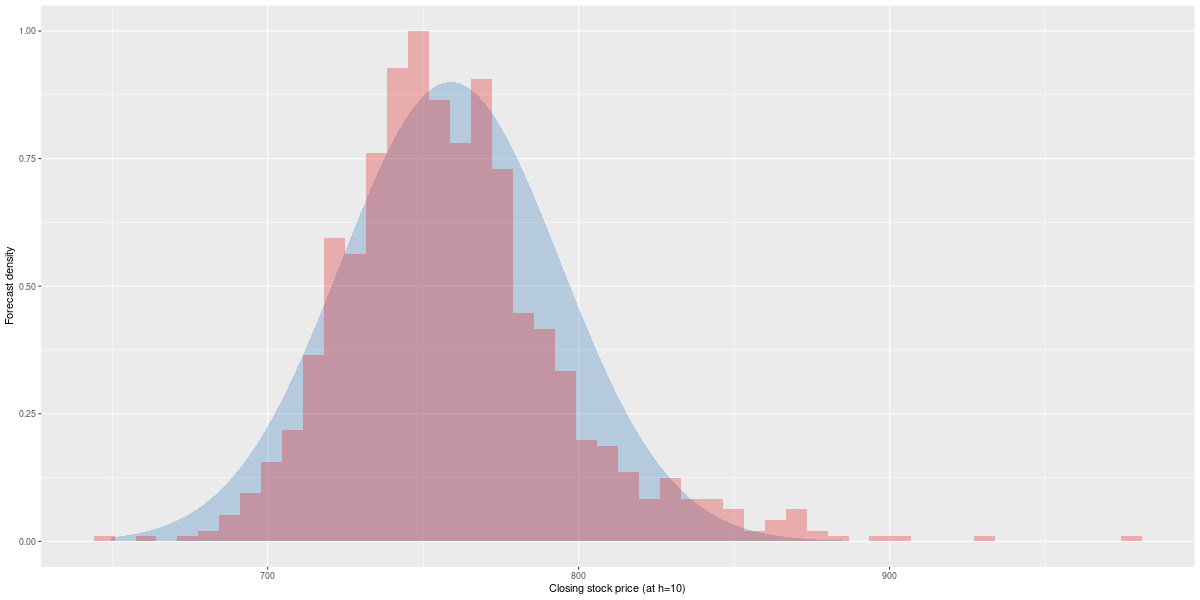

In [5]:

%%R -w 1200 -h 600  # Start a new R plot with specified dimensions

# Create a density plot and histogram for the forecasts at day 10
fc10 <- fc |> filter(day == max(day))  # Select forecasts for the last day (day 10)

ggplot() +
  # Add a density plot for the theoretical forecast
  stat_dist_slab(aes(dist = Close, y = 0, fill = "Theoretical"),
    data = fc10 |> filter(.model == "Theoretical"),
    colour = NA, alpha = 0.3
  ) +
  # Add a histogram for the bootstrapped forecast
  geom_histogram(aes(x = x, y = after_stat(ndensity), fill = "Bootstrapped"),
    data = tibble(x = fc10 |>
      filter(.model == "Bootstrapped") |>
      pull(Close) |>
      unlist()),
    colour = NA, bins = 50, alpha = 0.3
  ) +
  scale_color_brewer(palette = "Set1") +  # Set color palette for lines
  scale_fill_brewer(palette = "Set1") +  # Set color palette for fill
  labs(x = "Closing stock price (at h=10)", y = "Forecast density") +
  theme(legend.position = "none")  # Remove legend

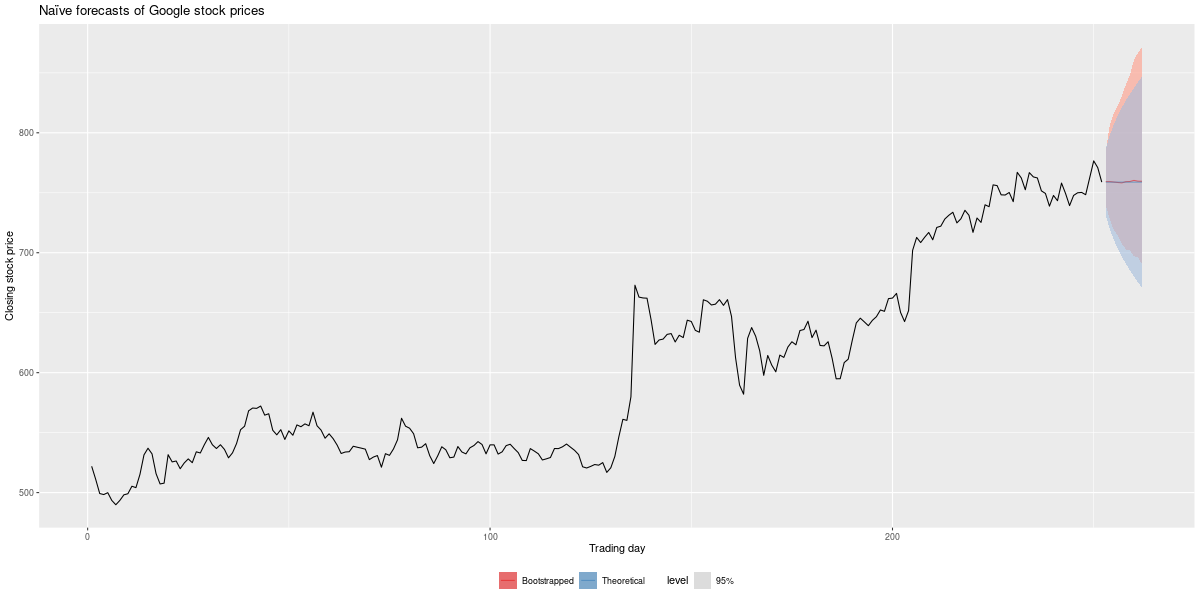

In [9]:
%%R -w 1200 -h 600

# Load required libraries
library(fpp3)  # For time series forecasting
library(ggdist)  # For distribution and uncertainty visualizations

# Filter and prepare the data
google_2015 <- gafa_stock |>
  filter(Symbol == "GOOG", year(Date) == 2015) |>  # Select Google stock data for 2015
  mutate(day = row_number()) |>  # Add a day column for indexing
  update_tsibble(index = day, regular = TRUE)  # Update the time series object

# Fit a naive forecasting model
fit <- google_2015 |>
  model(ETS = ETS(Close))  # Use the naive method on closing prices

# Generate forecasts
fc <- bind_rows(
  forecast(fit, h = 10) |> mutate(.model = "Theoretical"),  # Theoretical forecast for 10 days ahead
  forecast(fit, h = 10, bootstrap = TRUE, times = 1000) |> mutate(.model = "Bootstrapped")  # Bootstrapped forecast
)

# Create a time plot of the forecasts
fc |>
  autoplot(google_2015, alpha = 0.6, level = 95) +  # Plot forecasts with 95% confidence interval
  ggtitle("Naïve forecasts of Google stock prices") +
  labs(y = "Closing stock price", x = "Trading day", fill = NULL, colour = NULL) +
  scale_fill_brewer(palette = "Set1") +  # Set color palette for fill
  scale_color_brewer(palette = "Set1") +  # Set color palette for lines
  theme(legend.position = "bottom") +
  guides(level = "none")  # Remove legend for confidence levels


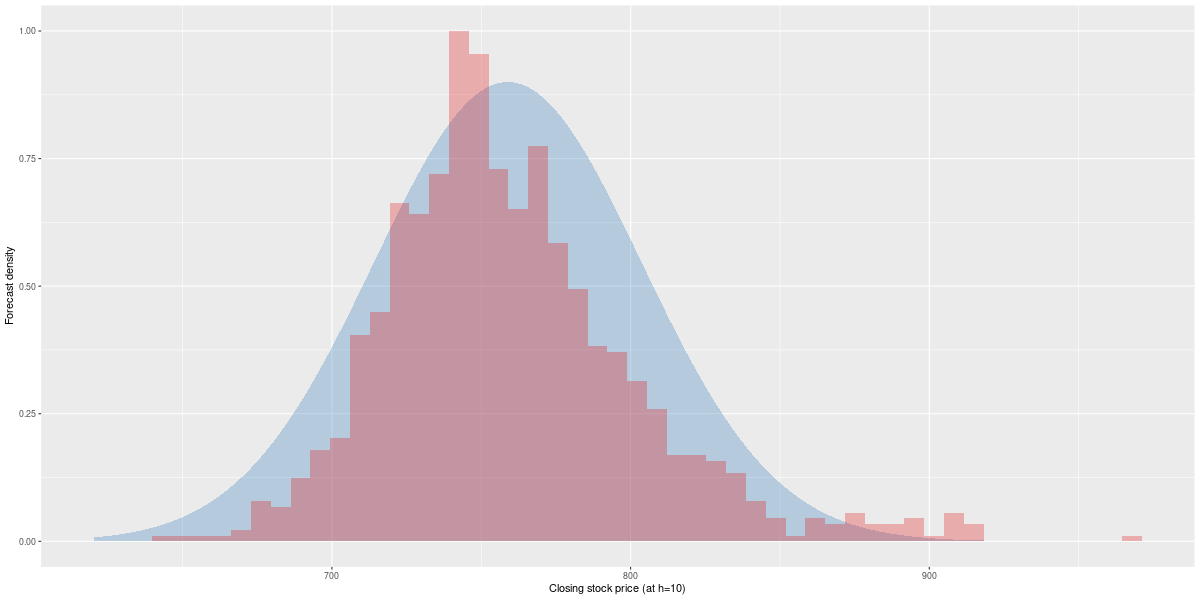

In [11]:

%%R -w 1200 -h 600  # Start a new R plot with specified dimensions

# Create a density plot and histogram for the forecasts at day 10
fc10 <- fc |> filter(day == max(day))  # Select forecasts for the last day (day 10)

ggplot() +
  # Add a density plot for the theoretical forecast
  stat_dist_slab(aes(dist = Close, y = 0, fill = "Theoretical"),
    data = fc10 |> filter(.model == "Theoretical"),
    colour = NA, alpha = 0.3
  ) +
  # Add a histogram for the bootstrapped forecast
  geom_histogram(aes(x = x, y = after_stat(ndensity), fill = "Bootstrapped"),
    data = tibble(x = fc10 |>
      filter(.model == "Bootstrapped") |>
      pull(Close) |>
      unlist()),
    colour = NA, bins = 50, alpha = 0.3
  ) +
  scale_color_brewer(palette = "Set1") +  # Set color palette for lines
  scale_fill_brewer(palette = "Set1") +  # Set color palette for fill
  labs(x = "Closing stock price (at h=10)", y = "Forecast density") +
  theme(legend.position = "none")  # Remove legend

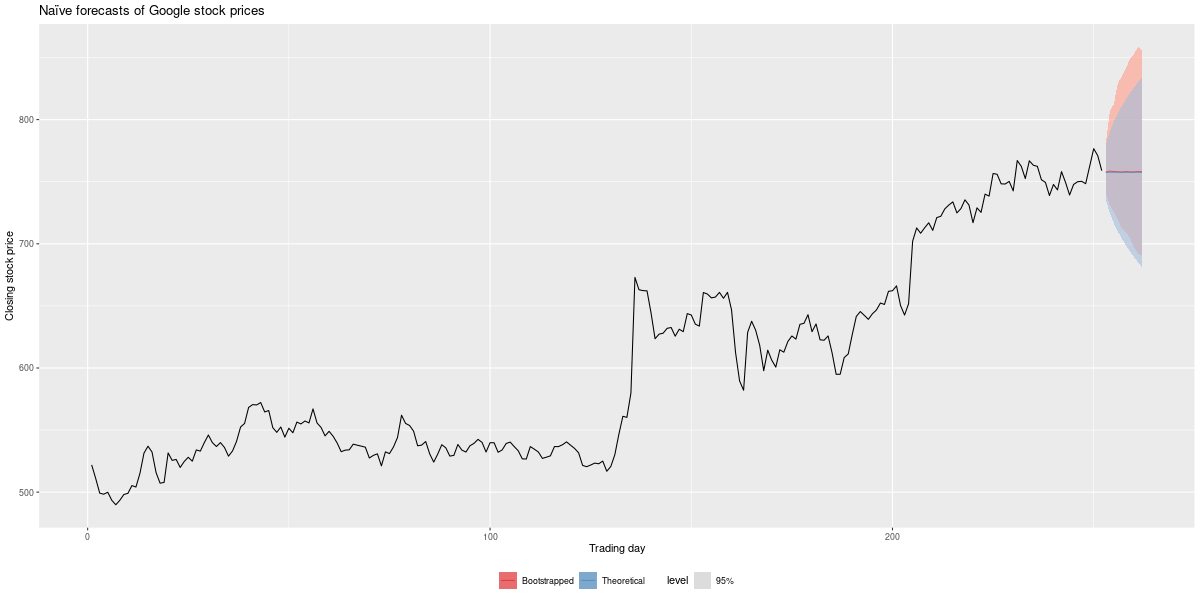

In [15]:
%%R -w 1200 -h 600

# Load required libraries
library(fpp3)  # For time series forecasting
library(ggdist)  # For distribution and uncertainty visualizations

# Filter and prepare the data
google_2015 <- gafa_stock |>
  filter(Symbol == "GOOG", year(Date) == 2015) |>  # Select Google stock data for 2015
  mutate(day = row_number()) |>  # Add a day column for indexing
  update_tsibble(index = day, regular = TRUE)  # Update the time series object

# Fit a naive forecasting model
fit <- google_2015 |>
  model(ARIMA = ARIMA(Close))  # Use the naive method on closing prices

# Generate forecasts
fc <- bind_rows(
  forecast(fit, h = 10) |> mutate(.model = "Theoretical"),  # Theoretical forecast for 10 days ahead
  forecast(fit, h = 10, bootstrap = TRUE, times = 1000) |> mutate(.model = "Bootstrapped")  # Bootstrapped forecast
)

# Create a time plot of the forecasts
fc |>
  autoplot(google_2015, alpha = 0.6, level = 95) +  # Plot forecasts with 95% confidence interval
  ggtitle("Naïve forecasts of Google stock prices") +
  labs(y = "Closing stock price", x = "Trading day", fill = NULL, colour = NULL) +
  scale_fill_brewer(palette = "Set1") +  # Set color palette for fill
  scale_color_brewer(palette = "Set1") +  # Set color palette for lines
  theme(legend.position = "bottom") +
  guides(level = "none")  # Remove legend for confidence levels


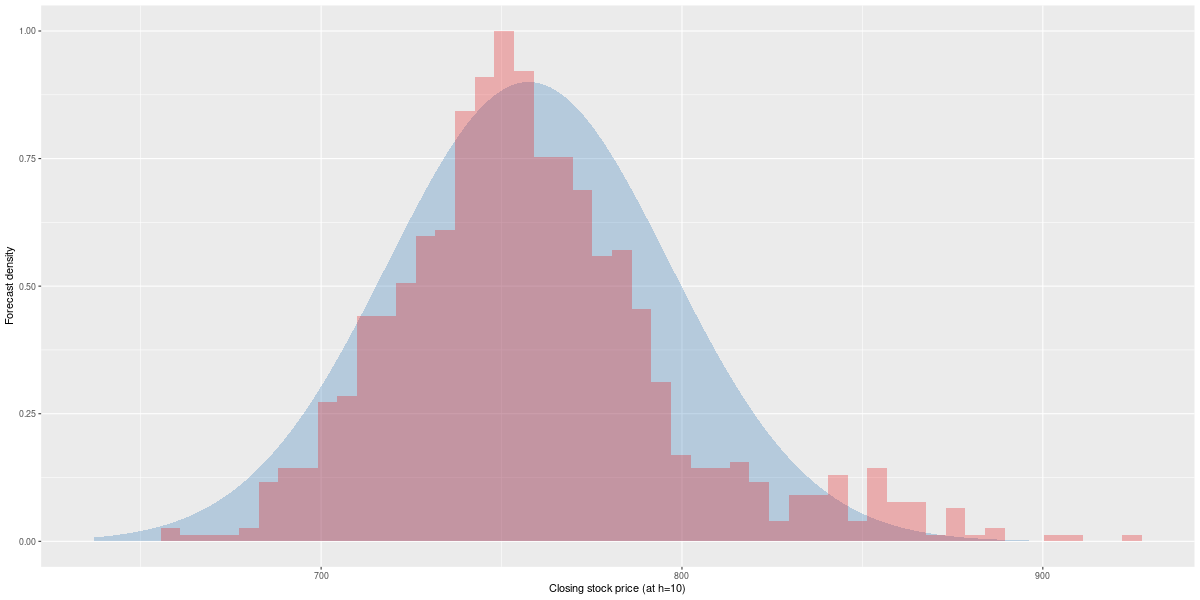

In [16]:
%%R -w 1200 -h 600  # Start a new R plot with specified dimensions

# Create a density plot and histogram for the forecasts at day 10
fc10 <- fc |> filter(day == max(day))  # Select forecasts for the last day (day 10)

ggplot() +
  # Add a density plot for the theoretical forecast
  stat_dist_slab(aes(dist = Close, y = 0, fill = "Theoretical"),
    data = fc10 |> filter(.model == "Theoretical"),
    colour = NA, alpha = 0.3
  ) +
  # Add a histogram for the bootstrapped forecast
  geom_histogram(aes(x = x, y = after_stat(ndensity), fill = "Bootstrapped"),
    data = tibble(x = fc10 |>
      filter(.model == "Bootstrapped") |>
      pull(Close) |>
      unlist()),
    colour = NA, bins = 50, alpha = 0.3
  ) +
  scale_color_brewer(palette = "Set1") +  # Set color palette for lines
  scale_fill_brewer(palette = "Set1") +  # Set color palette for fill
  labs(x = "Closing stock price (at h=10)", y = "Forecast density") +
  theme(legend.position = "none")  # Remove legend